In [1]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
replace titanic/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace titanic/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace titanic/titanic.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace titanic/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**Titanic - Machine Learning from Disaster**

# **Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier


**Load the Dataset**

In [2]:
titanic = pd.read_csv('/content/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Here is a brief description of the features (columns) present in the dataset:**

**PassengerId**: Unique identifier for each passenger.

**Survived**: Binary variable indicating whether the passenger survived (1) or not (0).

**Pclass**: Ticket class representing the socio-economic status of the passenger (1 = 1st class, 2 = 2nd class, 3 = 3rd class).

**Name**: Name of the passenger.

**Sex**: Gender of the passenger.

**Age**: Age of the passenger in years. It may contain fractional values.

**SibSp**: Number of siblings/spouses aboard the Titanic.

**Parch**: Number of parents/children aboard the Titanic.

**Ticket**: Ticket number.

**Fare**: Passenger fare (ticket price).

**Cabin**: Cabin number.

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### **Data Cleaning**

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age has a missing values of 177 in the data, Cabin has 687 missing values(looks like we will drop the column), and Embarked has 2 missing values . Let's fill AGe column with their mean.

In [5]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have no missing values for Age, let's fill Embarked too

In [7]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Q has the least counts, let's use it to fill the missing values

In [8]:
titanic['Embarked'].fillna('Q', inplace = True)

We have no missing values so let's convert age column to int

In [9]:
titanic['Age'] = titanic['Age'].astype(int)

Dropping columns that are unneccesary

In [10]:
titanic.drop(labels = ['Name', 'Ticket', 'Cabin','PassengerId', 'Fare'], axis = 1, inplace = True)


Checking the data again

In [11]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    int64 
 4   SibSp     891 non-null    int64 
 5   Parch     891 non-null    int64 
 6   Embarked  891 non-null    object
dtypes: int64(5), object(2)
memory usage: 48.9+ KB


### **Data Visualization**

<ipython-input-13-fcc42c82ad15>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), annot=True, cmap='RdBu')


<Axes: >

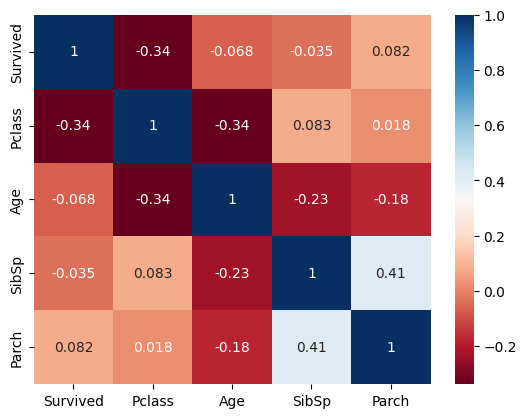

In [13]:
sns.heatmap(titanic.corr(), annot=True, cmap='RdBu')

<Axes: xlabel='Sex'>

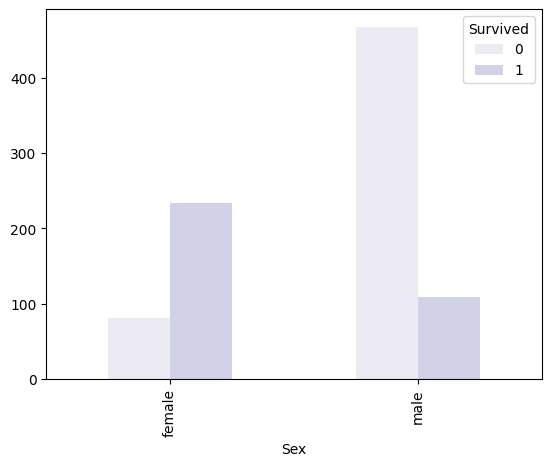

In [14]:

sns.set_palette('Purples')

titanic_groupby = titanic.groupby(['Sex', 'Survived']).size().unstack()
titanic_groupby.plot(kind = 'bar', stacked = False)


<Axes: xlabel='Pclass'>

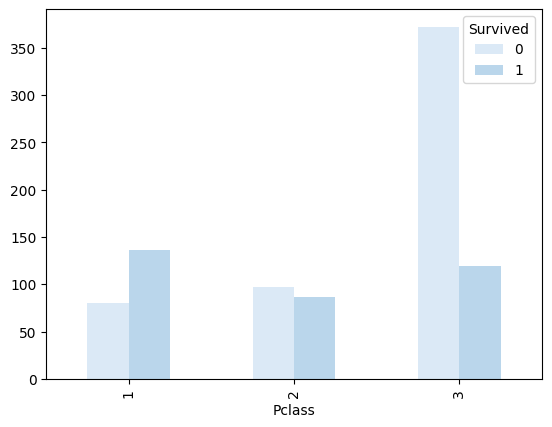

In [15]:

sns.set_palette('Blues')

titanic_groupby = titanic.groupby(['Pclass', 'Survived']).size().unstack()
titanic_groupby.plot(kind = 'bar', stacked = False)


<Axes: xlabel='Embarked'>

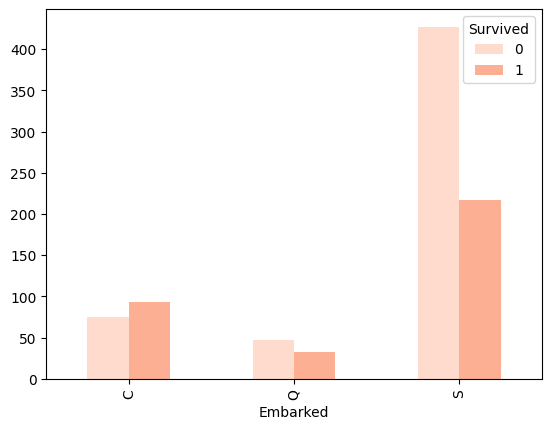

In [16]:

sns.set_palette('Reds')

titanic_groupby = titanic.groupby(['Embarked', 'Survived']).size().unstack()
titanic_groupby.plot(kind = 'bar', stacked = False)


<Axes: xlabel='Age_group'>

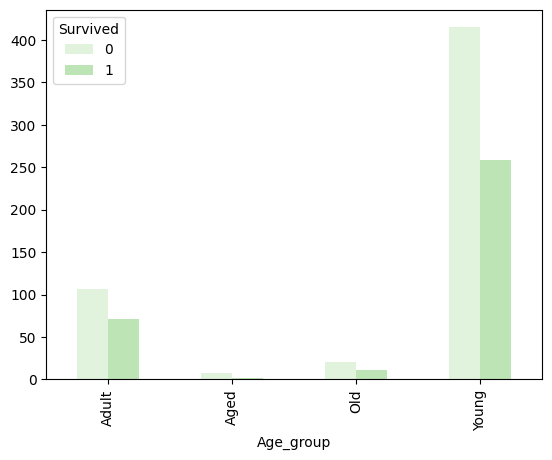

In [17]:
def Age_group(Age):
  if Age <= 35:
    return 'Young'
  elif Age <= 55:
    return 'Adult'
  elif Age <= 65:
    return 'Old'
  else:
    return 'Aged'


titanic['Age_group'] = titanic['Age'].apply(Age_group)
sns.set_palette('Greens')

titanic_groupby = titanic.groupby(['Age_group', 'Survived']).size().unstack()
titanic_groupby.plot(kind = 'bar', stacked = False)


<Axes: xlabel='Age_group'>

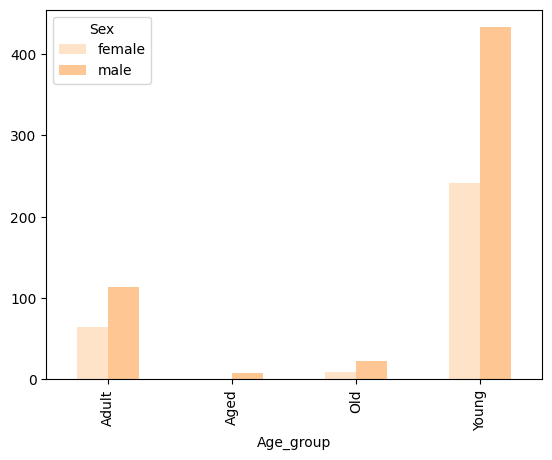

In [18]:

sns.set_palette('Oranges')

titanic_groupby = titanic.groupby(['Age_group', 'Sex']).size().unstack()
titanic_groupby.plot(kind = 'bar', stacked = False)


##**Model Training**

In [19]:
encoder = LabelEncoder()

In [20]:
titanic['Sex'] = encoder.fit_transform(titanic['Sex'])

{'female': 0, 'male': 1}

In [22]:
titanic['Embarked'] = encoder.fit_transform(titanic['Embarked'])

{'C': 0, 'Q': 1, 'S': 2}





In [23]:
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = titanic['Survived']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 456)

In [25]:
gbm = GradientBoostingClassifier(n_estimators = 9)

In [26]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [27]:
y_pred = gbm.predict(X_test)

In [28]:
confusion_matrix(y_test, y_pred)

array([[144,  20],
       [ 24,  80]])

In [29]:
accuracy = accuracy_score(y_test, y_pred)

In [30]:
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 83.58%


<Axes: >

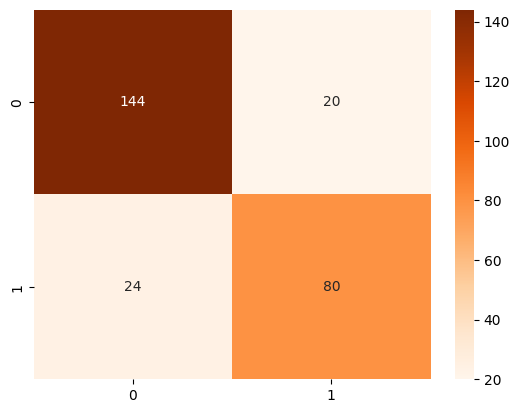

In [31]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, cmap = 'Oranges', fmt  = 'g')

### **Loading the test dataset**

In [32]:
test_data = pd.read_csv('/content/titanic/test.csv')

In [33]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)

In [35]:
test_data.drop(labels = ['Name', 'Ticket', 'Cabin','PassengerId', 'Fare'], axis = 1, inplace = True)

In [36]:
test_data['Sex'] = encoder.fit_transform(test_data['Sex'])
test_data['Embarked'] = encoder.fit_transform(test_data['Embarked'])

In [37]:
predictions = gbm.predict(test_data)

In [38]:
print(predictions)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [39]:
test_data['Survived'] = predictions

In [41]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,1,34.50000,0,0,1,0
1,3,0,47.00000,1,0,2,0
2,2,1,62.00000,0,0,1,0
3,3,1,27.00000,0,0,2,0
4,3,0,22.00000,1,1,2,0
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,2,0
414,1,0,39.00000,0,0,0,1
415,3,1,38.50000,0,0,2,0
416,3,1,30.27259,0,0,2,0
